# Climate Change Data Clean up

### Import libraries and reading data:

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import datetime

In [2]:
#importing data
emission_table = pd.read_csv("/Users/chloeguiver/code/Cguiver26/Climate-Change-Analysis/greenhouse_gas_inventory_data_data.csv")
temperature_data=pd.read_csv('/Users/chloeguiver/code/Cguiver26/Climate-Change-Analysis/GlobalLandTemperaturesByCountry.csv')
GDP_Data=pd.read_csv('/Users/chloeguiver/code/Cguiver26/Climate-Change-Analysis/UNdata_Export_GDP.csv')

### Exploring emission_table

In [3]:
emission_table.head()

,country_or_area,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...


In [4]:
grouped=emission_table.groupby(['category']).count()
grouped

,country_or_area,year,value
category,,,
carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074
greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent,949,949,949
greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074
hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent,975,975,975
methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074
nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent,248,248,248
nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074
perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent,831,831,831
sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent,1032,1032,1032


In [5]:
emission_table.shape

(8406, 4)

In [6]:
emission_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_or_area  8406 non-null   object 
 1   year             8406 non-null   int64  
 2   value            8406 non-null   float64
 3   category         8406 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 262.8+ KB


### Cleaning emission_table

In [89]:
n_missing= emission_table.isnull().sum()
n_missing

country_or_area    0
year               0
value              0
category           0
dtype: int64

In [8]:
#Editing the catagory name
cat_emission_table=emission_table.replace(to_replace=['carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'],value = ["CO2"])
cat_emission_table=cat_emission_table.replace(to_replace=['greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent'],value = ["GHG,Indirect CO2"])
cat_emission_table=cat_emission_table.replace(to_replace=['greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'],value = ["GHG"])
cat_emission_table=cat_emission_table.replace(to_replace=['hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent'],value = ["HFC"])
cat_emission_table=cat_emission_table.replace(to_replace=['methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'],value = ["CH4"])
cat_emission_table=cat_emission_table.replace(to_replace=['nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent'],value = ["NF3"])
cat_emission_table=cat_emission_table.replace(to_replace=['nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'],value = ["N20"])
cat_emission_table=cat_emission_table.replace(to_replace=['perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent'],value = ["pfcs"])
cat_emission_table=cat_emission_table.replace(to_replace=['sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent'],value = ["sf6"])
cat_emission_table=cat_emission_table.replace(to_replace=['unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent'],value = ["hfcs"])
cat_emission_table

,country_or_area,year,value,category
0,Australia,2014,393126.946994,CO2
1,Australia,2013,396913.936530,CO2
2,Australia,2012,406462.847704,CO2
3,Australia,2011,403705.528314,CO2
4,Australia,2010,406200.993184,CO2
...,...,...,...,...
8401,United States of America,1994,593.222570,hfcs
8402,United States of America,1993,586.939752,hfcs
8403,United States of America,1992,574.414624,hfcs
8404,United States of America,1991,566.900968,hfcs


Pivoting the table to a better format

In [9]:
pivoted_ghg=pd.pivot(cat_emission_table, values='value',index=["country_or_area","year"], columns=["category"]).reset_index()
pivoted_ghg.head()

category,country_or_area,year,CH4,CO2,GHG,"GHG,Indirect CO2",HFC,N20,NF3,hfcs,pfcs,sf6
0,Australia,1990,118768.837813,278265.898941,418623.049563,418623.049563,1424.683520,15345.597858,NaN,NaN,4607.012919,211.018511
1,Australia,1991,117744.641814,279741.639012,418674.057494,418674.057494,1424.683520,14923.405021,NaN,NaN,4610.743294,228.944834
2,Australia,1992,116837.506726,284766.092718,423080.108191,423080.108191,1333.184000,15293.183355,NaN,NaN,4603.282544,246.858849
3,Australia,1993,113837.511923,289142.267681,423764.932564,423764.932564,1829.872000,15374.993428,NaN,NaN,3315.528376,264.759156
4,Australia,1994,110997.410185,293830.709141,424092.959373,424092.959373,1027.343549,15790.426852,NaN,NaN,2164.428749,282.640896


### Exploring temperature_data

In [10]:
temperature_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [11]:
temperature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


### Cleaning temperature_data

#### changing the date to datetime format

In [12]:
temperature_data['dt'] = pd.to_datetime(temperature_data['dt'])
temperature_data['Year'] = temperature_data['dt'].dt.strftime('%Y')
temperature_data['YearMonth'] = temperature_data['dt'].dt.strftime('%Y-%m')

#### Filtering for years 1990-2013

In [13]:
years=['1990','1991','1992','1993','1994','1995','1996','1997','1998'
       ,'1999','2000','2001','2002','2003','2004','2005','2006','2007'
       ,'2008','2009','2010','2011','2012','2013','2014','2015']
temp_data=temperature_data.loc[temperature_data['Year'].isin(years)].drop(columns=['AverageTemperatureUncertainty'])
temp_data

,dt,AverageTemperature,Country,Year,YearMonth
2954,1990-01-01,0.515,Åland,1990,1990-01
2955,1990-02-01,3.350,Åland,1990,1990-02
2956,1990-03-01,3.134,Åland,1990,1990-03
2957,1990-04-01,4.846,Åland,1990,1990-04
2958,1990-05-01,8.708,Åland,1990,1990-05
...,...,...,...,...,...
577457,2013-05-01,19.059,Zimbabwe,2013,2013-05
577458,2013-06-01,17.613,Zimbabwe,2013,2013-06
577459,2013-07-01,17.000,Zimbabwe,2013,2013-07
577460,2013-08-01,19.759,Zimbabwe,2013,2013-08


#### checking null values

In [14]:
temp_data.isna().sum()

dt                      0
AverageTemperature    506
Country                 0
Year                    0
YearMonth               0
dtype: int64

In [15]:
#checking the null data in excel
temp_data[temp_data['AverageTemperature']=='Null'].groupby(['Country','Year']).count().reset_index().to_clipboard()

In [16]:
temp_data['AverageTemperature'] = temp_data['AverageTemperature'].fillna('Null')

In [17]:
temp_data.drop(temp_data[temp_data['AverageTemperature']=='Null'].index,inplace=True)
temp_data

,dt,AverageTemperature,Country,Year,YearMonth
2954,1990-01-01,0.515,Åland,1990,1990-01
2955,1990-02-01,3.35,Åland,1990,1990-02
2956,1990-03-01,3.134,Åland,1990,1990-03
2957,1990-04-01,4.846,Åland,1990,1990-04
2958,1990-05-01,8.708,Åland,1990,1990-05
...,...,...,...,...,...
577456,2013-04-01,21.142,Zimbabwe,2013,2013-04
577457,2013-05-01,19.059,Zimbabwe,2013,2013-05
577458,2013-06-01,17.613,Zimbabwe,2013,2013-06
577459,2013-07-01,17.0,Zimbabwe,2013,2013-07


### GDP data

In [18]:
GDP_Data.head()

,Country or Area,Year,Item,Value
0,Australia,2013,Gross Domestic Product (GDP),66360.873829
1,Australia,2012,Gross Domestic Product (GDP),69451.238670
2,Australia,2011,Gross Domestic Product (GDP),68625.825695
3,Australia,2010,Gross Domestic Product (GDP),58654.114395
4,Australia,2009,Gross Domestic Product (GDP),46657.287877


In [19]:
GDP_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  1008 non-null   object 
 1   Year             1008 non-null   int64  
 2   Item             1008 non-null   object 
 3   Value            1008 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 31.6+ KB


In [20]:
GDP_Data['Year']=GDP_Data['Year'].astype('str')

#### checking country names for merging tables


In [23]:
pivoted_ghg['country_or_area'].unique()

array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Canada',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'European Union', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Russian Federation', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom',
       'United States of America'], dtype=object)

In [24]:
GDP_Data['Country or Area'].unique()

array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Canada',
       'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
       'Italy', 'Japan', 'Latvia', 'Liechtenstein', 'Lithuania',
       'Luxembourg', 'Malta', 'Monaco', 'Netherlands', 'New Zealand',
       'Norway', 'Poland', 'Portugal', 'Romania', 'Russian Federation',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'Ukraine', 'United Kingdom of Great Britain and Northern Ireland',
       'United States'], dtype=object)

In [25]:
temp_data['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt'

In [26]:
# checking that the two sets of UK values are duplicates and can be dropped
temp_data.loc[temp_data['Country'].isin(['United Kingdom (Europe)','United Kingdom'])].to_clipboard()

In [27]:
#removing the duplicated uk entry
temp_data.drop(temp_data[temp_data['Country']=='United Kingdom (Europe)'].index,inplace=True)

In [28]:
#pivoting the temp_data table for merging
temperature=pd.DataFrame(temp_data.groupby(['Country','Year'])['AverageTemperature'].mean()).reset_index()
temperature

,Country,Year,AverageTemperature
0,Afghanistan,1990,14.993333
1,Afghanistan,1991,14.370750
2,Afghanistan,1992,14.056083
3,Afghanistan,1993,14.439250
4,Afghanistan,1994,14.754750
...,...,...,...
5779,Åland,2009,6.489083
5780,Åland,2010,4.861917
5781,Åland,2011,7.170750
5782,Åland,2012,6.063917


In [36]:
# Changing the country name so tables can be merged
def update_countries(country):
    if country=='Czechia':
        return 'Czech Republic'
    if country=='Russian Federation':
        return 'Russia'
    if country=='United States of America':
        return 'United States'
    if country=='United Kingdom of Great Britain and Northern Ireland':
        return 'United Kingdom'
    else:
        return country

updating the country names using the above function so the tables can be merged on common data.

In [37]:
pivoted_ghg['country_clean']=pivoted_ghg['country_or_area'].apply(lambda x: update_countries(x))
GDP_Data['country_clean']=GDP_Data['Country or Area'].apply(lambda x: update_countries(x))

In [38]:
GDP_Data['country_clean'].unique()

array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Canada',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Japan', 'Latvia', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Malta', 'Monaco', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'Ukraine', 'United Kingdom', 'United States'], dtype=object)

In [ ]:
climate_data['Country'].unique()

### Merging pivoted_ghg and temperature tables

In [90]:
pivoted_ghg['year']=pivoted_ghg['year'].astype('str')
climate_data=pd.merge(pivoted_ghg,temperature, left_on=['year','country_clean'],right_on=['Year','Country'],how='left')
climate_data.head()

,country_or_area,year,CH4,CO2,GHG,"GHG,Indirect CO2",HFC,N20,NF3,hfcs,pfcs,sf6,country_clean,Country,Year,AverageTemperature
0,Australia,1990,118768.837813,278265.898941,418623.049563,418623.049563,1424.683520,15345.597858,NaN,NaN,4607.012919,211.018511,Australia,Australia,1990,22.355750
1,Australia,1991,117744.641814,279741.639012,418674.057494,418674.057494,1424.683520,14923.405021,NaN,NaN,4610.743294,228.944834,Australia,Australia,1991,22.487417
2,Australia,1992,116837.506726,284766.092718,423080.108191,423080.108191,1333.184000,15293.183355,NaN,NaN,4603.282544,246.858849,Australia,Australia,1992,21.932583
3,Australia,1993,113837.511923,289142.267681,423764.932564,423764.932564,1829.872000,15374.993428,NaN,NaN,3315.528376,264.759156,Australia,Australia,1993,22.160167
4,Australia,1994,110997.410185,293830.709141,424092.959373,424092.959373,1027.343549,15790.426852,NaN,NaN,2164.428749,282.640896,Australia,Australia,1994,22.030250


In [80]:
climate=pd.merge(climate_data,GDP_Data, left_on=['country_clean','year'],right_on=['country_clean','Year'],how='left')


Removing duplcate columns from the merge:

In [81]:
climate=climate.drop(columns=['country_or_area','Country','Year_x','Country or Area','Year_y'])


In [82]:
climate.rename(columns={"Value": "Gross Domestic Product (GDP)"},inplace=True)
climate.head()

,year,CH4,CO2,GHG,"GHG,Indirect CO2",HFC,N20,NF3,hfcs,pfcs,sf6,country_clean,AverageTemperature,Item,Gross Domestic Product (GDP)
0,1990,118768.837813,278265.898941,418623.049563,418623.049563,1424.683520,15345.597858,NaN,NaN,4607.012919,211.018511,Australia,22.355750,Gross Domestic Product (GDP),19076.528353
1,1991,117744.641814,279741.639012,418674.057494,418674.057494,1424.683520,14923.405021,NaN,NaN,4610.743294,228.944834,Australia,22.487417,Gross Domestic Product (GDP),19144.019367
2,1992,116837.506726,284766.092718,423080.108191,423080.108191,1333.184000,15293.183355,NaN,NaN,4603.282544,246.858849,Australia,21.932583,Gross Domestic Product (GDP),18712.176695
3,1993,113837.511923,289142.267681,423764.932564,423764.932564,1829.872000,15374.993428,NaN,NaN,3315.528376,264.759156,Australia,22.160167,Gross Domestic Product (GDP),17992.341797
4,1994,110997.410185,293830.709141,424092.959373,424092.959373,1027.343549,15790.426852,NaN,NaN,2164.428749,282.640896,Australia,22.030250,Gross Domestic Product (GDP),20315.805022


Many countries missing data entry's for 2014 so dropping all 2014 values. 

In [83]:
climate.drop(climate_data[climate_data['year']=='2014'].index,inplace=True)

In [84]:
climate.drop(columns=['Item'],inplace=True)
climate.head()

,year,CH4,CO2,GHG,"GHG,Indirect CO2",HFC,N20,NF3,hfcs,pfcs,sf6,country_clean,AverageTemperature,Gross Domestic Product (GDP)
0,1990,118768.837813,278265.898941,418623.049563,418623.049563,1424.683520,15345.597858,NaN,NaN,4607.012919,211.018511,Australia,22.355750,19076.528353
1,1991,117744.641814,279741.639012,418674.057494,418674.057494,1424.683520,14923.405021,NaN,NaN,4610.743294,228.944834,Australia,22.487417,19144.019367
2,1992,116837.506726,284766.092718,423080.108191,423080.108191,1333.184000,15293.183355,NaN,NaN,4603.282544,246.858849,Australia,21.932583,18712.176695
3,1993,113837.511923,289142.267681,423764.932564,423764.932564,1829.872000,15374.993428,NaN,NaN,3315.528376,264.759156,Australia,22.160167,17992.341797
4,1994,110997.410185,293830.709141,424092.959373,424092.959373,1027.343549,15790.426852,NaN,NaN,2164.428749,282.640896,Australia,22.030250,20315.805022


### Exploratory Analysis

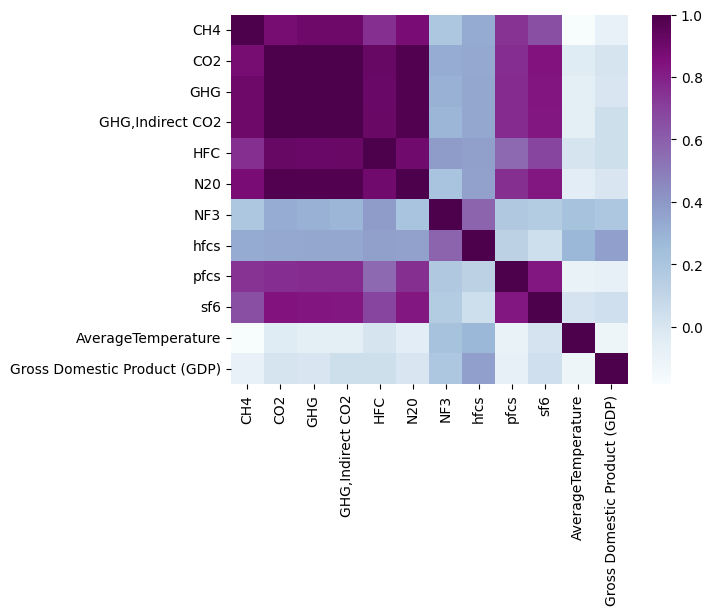

In [85]:
correlation_matrix = climate.corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= 'BuPu');

GHG, Indirect CO2 is redundant as values are very similar for GHG, as seen in higher correlation. Not surprising that all types of greenhouse gas have high correlation. 

In [87]:

climate.drop(climate[climate_data['country_or_area']=='European Union'].index,inplace=True)
climate=climate.drop(columns=['GHG,Indirect CO2'])

/var/folders/fw/_h7pg8_x0qd1n62rg_9h86lw0000gn/T/ipykernel_20653/1287179228.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  climate.drop(climate[climate_data['country_or_area']=='European Union'].index,inplace=True)


In [108]:
climate.head()

,year,CH4,CO2,GHG,HFC,N20,NF3,hfcs,pfcs,sf6,country_clean,AverageTemperature,Gross Domestic Product (GDP)
0,1990,118768.837813,278265.898941,418623.049563,1424.683520,15345.597858,NaN,NaN,4607.012919,211.018511,Australia,22.355750,19076.528353
1,1991,117744.641814,279741.639012,418674.057494,1424.683520,14923.405021,NaN,NaN,4610.743294,228.944834,Australia,22.487417,19144.019367
2,1992,116837.506726,284766.092718,423080.108191,1333.184000,15293.183355,NaN,NaN,4603.282544,246.858849,Australia,21.932583,18712.176695
3,1993,113837.511923,289142.267681,423764.932564,1829.872000,15374.993428,NaN,NaN,3315.528376,264.759156,Australia,22.160167,17992.341797
4,1994,110997.410185,293830.709141,424092.959373,1027.343549,15790.426852,NaN,NaN,2164.428749,282.640896,Australia,22.030250,20315.805022


In [97]:
climate_uk=climate[climate['country_clean']=='United Kingdom']
climate_uk

,year,CH4,CO2,GHG,HFC,N20,NF3,hfcs,pfcs,sf6,country_clean,AverageTemperature,Gross Domestic Product (GDP)
1024,1990,137607.978359,596398.473207,800107.488556,14391.426654,48778.607299,0.415007,NaN,1651.526859,1279.061171,United Kingdom,9.674583,19134.074789
1025,1991,138188.478428,604652.896878,809506.790747,14991.049026,48970.207975,0.477258,NaN,1385.143658,1318.537525,United Kingdom,8.828333,19946.772843
1026,1992,137621.814118,589306.018142,789105.259472,15597.633319,44530.646591,0.548846,NaN,690.352817,1358.245640,United Kingdom,9.025000,20536.020874
1027,1993,135765.417975,574764.752712,769256.780408,16505.692181,40434.659969,0.631173,NaN,602.731066,1182.895332,United Kingdom,8.669750,18427.357562
1028,1994,128718.699057,569458.364876,758318.470985,17593.431210,40712.416502,0.725849,NaN,611.395679,1223.437811,United Kingdom,9.150750,19743.362500
1029,1995,130927.696077,561202.953995,752463.918229,19096.094344,39375.031423,0.834726,NaN,596.937235,1264.370428,United Kingdom,9.419583,23242.418827
1030,1996,130231.724715,582752.784369,774225.784319,20249.438929,39088.814591,0.959935,NaN,596.359315,1305.702464,United Kingdom,8.551167,24462.577682
1031,1997,127791.871601,557608.779402,749518.796880,23105.010406,39228.836103,1.103926,NaN,503.116157,1280.079286,United Kingdom,9.644250,26745.825373
1032,1998,124554.185183,561253.722845,746962.022119,20075.147988,39255.248855,1.269514,NaN,493.732145,1328.715588,United Kingdom,9.462750,28257.186475
1033,1999,119677.351146,553827.549146,716299.410269,11466.711374,29354.678017,1.459942,NaN,473.959788,1497.700856,United Kingdom,9.663333,28712.526734


In [269]:
def CO2_per_country(country1,country2):
    world_CO2=pd.DataFrame(climate.groupby(['year'])['CO2'].mean())
    
    fig, (ax1,ax2) = plt.subplots(1,2)
    fig.set_figheight(6)
    fig.set_figwidth(15)

    
#country1
    ax1.set_title('Average CO2 Emissions for ' f'{country1}' ' compared to world average')
    data=climate[climate['country_clean']==f'{country1}']
    sns.lineplot(data=world_CO2,x='year',y='CO2',ax=ax1)
    sns.barplot(data=data,x='year',y='CO2',ax=ax1,palette=sns.color_palette("flare"),)
    plt.xticks(rotation=45)
    
#country2

    ax2.set_title('Average CO2 Emissions for ' f'{country2}' ' compared to world average')
    data=climate[climate['country_clean']==f'{country2}']
    sns.lineplot(data=world_CO2,x='year',y='CO2',ax=ax2)
    sns.barplot(data=data,x='year',y='CO2',ax=ax2,palette=sns.color_palette("flare"),)
    plt.xticks(rotation=45)

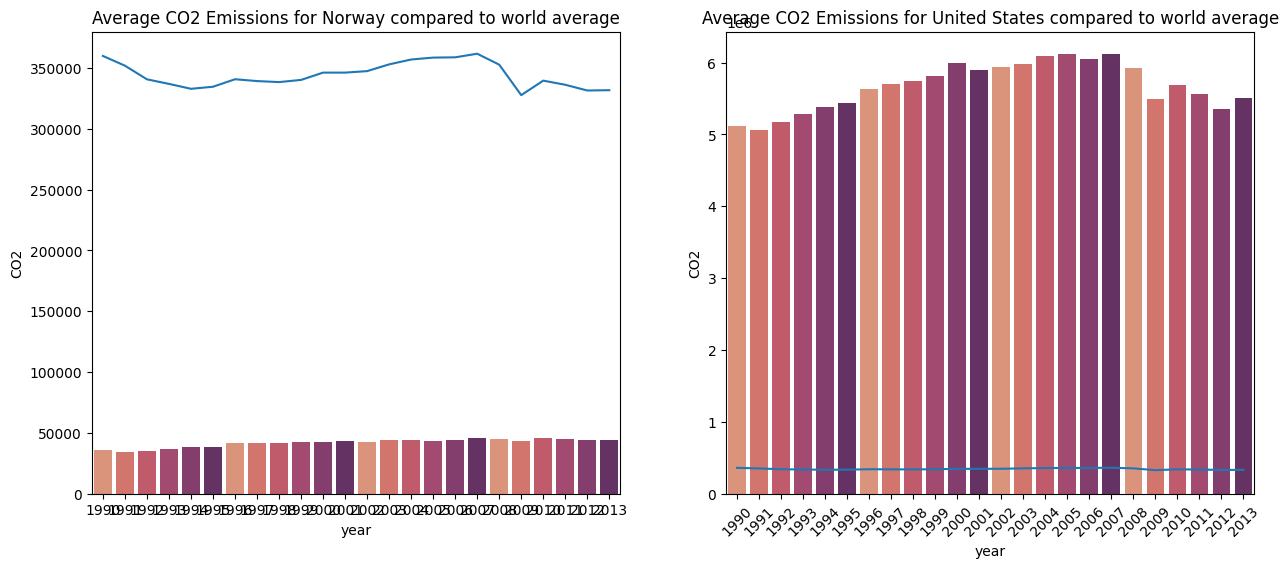

In [270]:
CO2_per_country('Norway','United States')

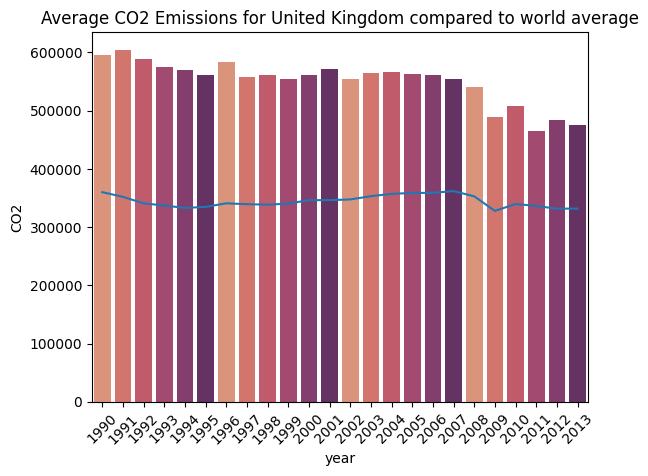

In [247]:
world_CO2=pd.DataFrame(climate.groupby(['year'])['CO2'].mean())
data=climate[climate['country_clean']=='United Kingdom']

sns.lineplot(data=world_CO2,x='year',y='CO2')
sns.barplot(data=data,x='year',y='CO2',palette=sns.color_palette("flare"))
plt.title(label='Average CO2 Emissions for United Kingdom compared to world average',loc='center')
plt.xticks(rotation=45)
plt.show();

In [307]:
climate.head()

,year,CH4,CO2,GHG,HFC,N20,NF3,hfcs,pfcs,sf6,country_clean,AverageTemperature,Gross Domestic Product (GDP)
0,1990,118768.837813,278265.898941,418623.049563,1424.683520,15345.597858,NaN,NaN,4607.012919,211.018511,Australia,22.355750,19076.528353
1,1991,117744.641814,279741.639012,418674.057494,1424.683520,14923.405021,NaN,NaN,4610.743294,228.944834,Australia,22.487417,19144.019367
2,1992,116837.506726,284766.092718,423080.108191,1333.184000,15293.183355,NaN,NaN,4603.282544,246.858849,Australia,21.932583,18712.176695
3,1993,113837.511923,289142.267681,423764.932564,1829.872000,15374.993428,NaN,NaN,3315.528376,264.759156,Australia,22.160167,17992.341797
4,1994,110997.410185,293830.709141,424092.959373,1027.343549,15790.426852,NaN,NaN,2164.428749,282.640896,Australia,22.030250,20315.805022


In [309]:
climate_b=climate.groupby(['year','country_clean'])['CO2'].mean().reset_index()
#temp_data.groupby(['Country','Year'])['AverageTemperature'].mean()).reset_index()

In [310]:
climate_b=climate_b.sort_values('CO2',ascending=False)
climate_b

,year,country_clean,CO2
671,2005,United States,6.122747e+06
755,2007,United States,6.121654e+06
629,2004,United States,6.096978e+06
713,2006,United States,6.042394e+06
461,2000,United States,5.992438e+06
...,...,...,...
823,2009,Monaco,7.777194e+01
865,2010,Monaco,7.546827e+01
949,2012,Monaco,7.516557e+01
991,2013,Monaco,7.443092e+01


In [304]:
years=climate_b['year'].unique()
years

array(['2005', '2007', '2004', '2006', '2000', '2003', '2002', '2008',
       '2001', '1999', '1998', '1997', '2010', '1996', '2011', '2013',
       '2009', '1995', '1994', '2012', '1993', '1992', '1990', '1991'],
      dtype=object)

In [312]:
fig=px.bar(climate_b,x='country_clean',y='CO2',title='Average CO2 Emissions per Country',template="plotly_white")
fig.show()